In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


#preprocesses of dataset

import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

load the dataset

In [5]:
df=pd.read_csv("/content/Electricity (1) (1).csv")

<ipython-input-5-686a806222b2>:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Electricity (1) (1).csv")


In [6]:
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


read the head

In [7]:
df.head

<bound method NDFrame.head of                DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month  Ye

read the last 10 columns

In [8]:
df.tail

<bound method NDFrame.tail of                DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month  Ye

In [9]:
df.shape

(38014, 18)

In [10]:
df.describe

<bound method NDFrame.describe of                DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month

In [11]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

#check the null values

In [12]:
df.isnull

<bound method DataFrame.isnull of                DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month

In [13]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        DateTime  Holiday  HolidayFlag  DayOfWeek  WeekOfYear    Day  Month  \
0         False    False        False      False       False  False  False   
1         False    False        False      False       False  False  False   
2         False    False        False      False       False  False  False   
3         False    False        False      False       False  False  False   
4         False    False        False      False       False  False  False   
...         ...      ...          ...        ...         ...    ...    ...   
38009     False    False        False      False       False  False  False   
38010     False    False        False      False       False  False  False   
38011     False    False        False      False       False  False  False   
38012     False    False        False      False       False  False  False   
38013     False    False        False      False       False  False  False   

 

In [14]:
df.dropna()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


#Feature engineering

label encoding

heatmap

<ipython-input-15-2ed981cfb257>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method='pearson')


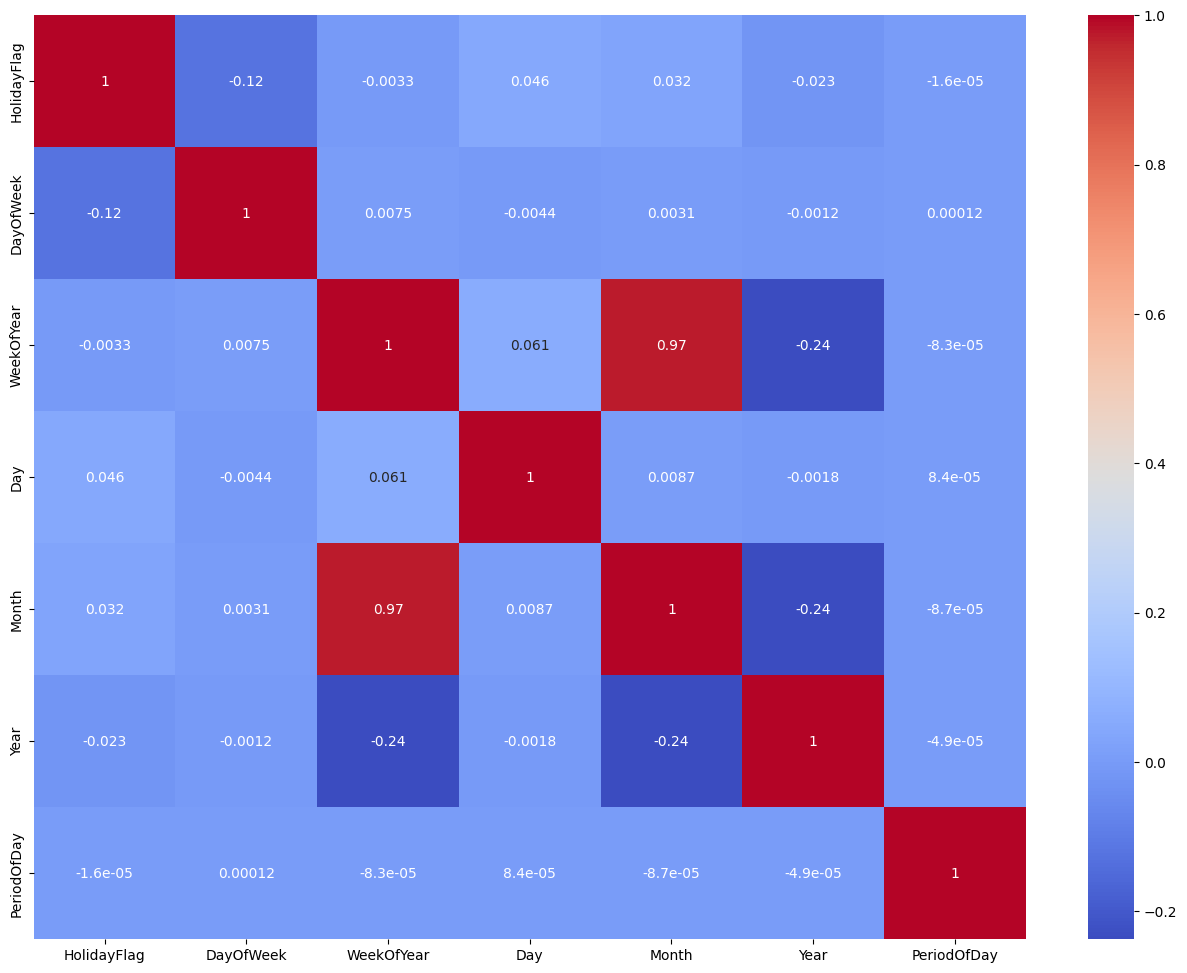

In [15]:

correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

convert float to numeric

specify target variabes and feature variables

In [33]:
target_variable = 'SystemLoadEA'  # Replace with your target variable
feature_columns = ['ForecastWindProduction', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']


In [34]:
df['SystemLoadEA_Lag1'] = df['SystemLoadEA'].shift(1)  # Lag feature for the target variable
df['SystemLoadEA_Lag7'] = df['SystemLoadEA'].shift(7)  # 7-day lag feature

In [35]:
print(df.dtypes)



DateTime                   object
Holiday                   float64
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction     object
SystemLoadEA              float64
SMPEA                      object
ORKTemperature             object
ORKWindspeed               object
CO2Intensity               object
ActualWindProduction       object
SystemLoadEP2              object
SMPEP2                     object
SystemLoadEA_Lag1         float64
SystemLoadEA_Lag7         float64
dtype: object


In [37]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary indicator for weekends


Lag features

In [38]:
# 2. Lag Features
df['SystemLoadEA_Lag1'] = df['SystemLoadEA'].shift(1)  # Lag feature for target variable
df['SystemLoadEA_Lag7'] = df['SystemLoadEA'].shift(7)

Intraction Features

In [39]:
# Convert the columns to numeric (with errors='coerce' to handle non-numeric values)
df['ForecastWindProduction'] = pd.to_numeric(df['ForecastWindProduction'], errors='coerce')
df['ActualWindProduction'] = pd.to_numeric(df['ActualWindProduction'], errors='coerce')

# Create the interaction feature
df['WindProductionInteraction'] = df['ForecastWindProduction'] * df['ActualWindProduction']


In [40]:
#Seasonal Features
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary indicator for weekends


In [41]:
# 6. Handling Missing Data
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,...,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,SystemLoadEA_Lag1,SystemLoadEA_Lag7,IsWeekend,WindProductionInteraction
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,...,6.00,9.30,600.71,356.0,3159.60,54.32,NaN,NaN,0,112250.36
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,...,6.00,11.10,605.42,317.0,2973.01,54.23,3388.77,NaN,0,102010.60
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,...,5.00,11.10,589.97,311.0,2834.00,54.23,3196.66,NaN,0,102185.27
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,...,6.00,9.30,585.94,313.0,2725.99,53.47,3060.71,NaN,0,105042.80
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,...,6.00,11.10,571.52,346.0,2655.64,39.87,2945.56,NaN,0,118643.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,NaN,1,1,1,31,12,2013,43,1179.14,...,6.00,22.20,285.31,812.0,3692.95,42.45,4000.49,4540.14,0,957461.68
38010,31/12/2013 22:00,NaN,1,1,1,31,12,2013,44,1152.01,...,5.00,24.10,278.31,852.0,3571.0,33.83,3932.22,4467.37,0,981512.52
38011,31/12/2013 22:30,NaN,1,1,1,31,12,2013,45,1123.67,...,4.00,20.40,280.91,962.0,3460.29,31.75,3821.44,4356.46,0,1080970.54
38012,31/12/2013 23:00,NaN,1,1,1,31,12,2013,46,1094.24,...,5.00,14.80,302.46,950.0,3563.99,50.6,3724.21,4286.95,0,1039528.00


error handling

In [42]:
import pandas as pd

# Convert the problematic column to numeric with error handling
df['SystemLoadEA'] = pd.to_numeric(df['SystemLoadEA'], errors='coerce')

# Handle missing values (e.g., filling NaN with a default value)
mean_value = df['SystemLoadEA'].mean()
df['SystemLoadEA'].fillna(mean_value, inplace=True)


In [43]:
# 7. Scaling and Normalization (if needed)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['SystemLoadEA', 'ForecastWindProduction', 'ActualWindProduction']] = scaler.fit_transform(
    df[['SystemLoadEA', 'ForecastWindProduction', 'ActualWindProduction']])


#outlier detection

In [45]:
# Calculate the IQR (Interquartile Range)
Q1 = df[target_variable].quantile(0.25)
Q3 = df[target_variable].quantile(0.75)
IQR = Q3 - Q1


In [46]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [47]:
# Remove outliers and create a new DataFrame without outliers
data_no_outliers = df[(df[target_variable] >= lower_bound) & (df[target_variable] <= upper_bound)]

In [48]:
# Reset the index of the new DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,...,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,SystemLoadEA_Lag1,SystemLoadEA_Lag7,IsWeekend,WindProductionInteraction
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,0.187356,...,6.00,9.30,600.71,0.200792,3159.60,54.32,NaN,NaN,0,112250.36
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,0.191220,...,6.00,11.10,605.42,0.178733,2973.01,54.23,3388.77,NaN,0,102010.60
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,0.195252,...,5.00,11.10,589.97,0.175339,2834.00,54.23,3196.66,NaN,0,102185.27
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,0.199438,...,6.00,9.30,585.94,0.176471,2725.99,53.47,3060.71,NaN,0,105042.80
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,0.203785,...,6.00,11.10,571.52,0.195136,2655.64,39.87,2945.56,NaN,0,118643.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,NaN,1,1,1,31,12,2013,43,0.701748,...,6.00,22.20,285.31,0.458710,3692.95,42.45,4000.49,4540.14,0,957461.68
38010,31/12/2013 22:00,NaN,1,1,1,31,12,2013,44,0.685593,...,5.00,24.10,278.31,0.481335,3571.0,33.83,3932.22,4467.37,0,981512.52
38011,31/12/2013 22:30,NaN,1,1,1,31,12,2013,45,0.668717,...,4.00,20.40,280.91,0.543552,3460.29,31.75,3821.44,4356.46,0,1080970.54
38012,31/12/2013 23:00,NaN,1,1,1,31,12,2013,46,0.651192,...,5.00,14.80,302.46,0.536765,3563.99,50.6,3724.21,4286.95,0,1039528.00


#split the dataset

In [49]:

from sklearn.model_selection import train_test_split

In [50]:
from pandas.core.groupby.generic import DataFrameGroupBy


# Define training and testing sets
X = df[feature_columns]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Extracting important Features

In [21]:
important_features = ['SystemLoadEP2','ActualWindProduction','SMPEP2','CO2Intensity']
X = df[important_features]
# Select the target variable
y = df['SystemLoadEA']

implement random forest algorithmn

In [51]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,...,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,SystemLoadEA_Lag1,SystemLoadEA_Lag7,IsWeekend,WindProductionInteraction
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,0.187356,...,6.00,9.30,600.71,0.200792,3159.60,54.32,NaN,NaN,0,112250.36
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,0.191220,...,6.00,11.10,605.42,0.178733,2973.01,54.23,3388.77,NaN,0,102010.60
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,0.195252,...,5.00,11.10,589.97,0.175339,2834.00,54.23,3196.66,NaN,0,102185.27
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,0.199438,...,6.00,9.30,585.94,0.176471,2725.99,53.47,3060.71,NaN,0,105042.80
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,0.203785,...,6.00,11.10,571.52,0.195136,2655.64,39.87,2945.56,NaN,0,118643.40


In [52]:
def clean_column(column):


    return column

# Apply the clean_column function to the affected columns
columns_to_clean = ['ForecastWindProduction', 'SMPEA','SystemLoadEA','SystemLoadEP2','ORKWindspeed','CO2Intensity','SMPEP2','ActualWindProduction','SystemLoadEP2','SMPEP2']  # Replace with the actual column names
for column in columns_to_clean:
    df[column] = clean_column(df[column])

# Fill NaN values with the mean or other appropriate strategies
df.fillna(df.mean(numeric_only=True), inplace=True)


In [53]:
X_train.dtypes

ForecastWindProduction    float64
CO2Intensity               object
ActualWindProduction      float64
SystemLoadEP2              object
SMPEP2                     object
dtype: object

In [54]:
X_train.dtypes

ForecastWindProduction    float64
CO2Intensity               object
ActualWindProduction      float64
SystemLoadEP2              object
SMPEP2                     object
dtype: object

conversion of float to numeric

In [55]:
# Convert the 'ColumnToConvert' from object to float
df['Holiday'] = pd.to_numeric(df['Holiday'], errors='coerce')

# Ensure the data type of the column is now float
df['Holiday'] = df['Holiday'].astype(float)

In [56]:
x = df[['CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']]
y = df["SMPEP2"]


In [60]:
#Convert the 'ColumnToConvert' from object to float
df['Holiday'] = pd.to_numeric(df['Holiday'], errors='coerce')

# Ensure the data type of the column is now float
df['Holiday'] = df['Holiday'].astype(float)

In [196]:
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [198]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 5193.759455545947
R-squared (R2): -129939.93353854772


In [199]:
# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)

In [200]:
print(f"explained_variance_score:{explained_variance}")

explained_variance_score:-29429.444170609273


visualize predicted vs actual

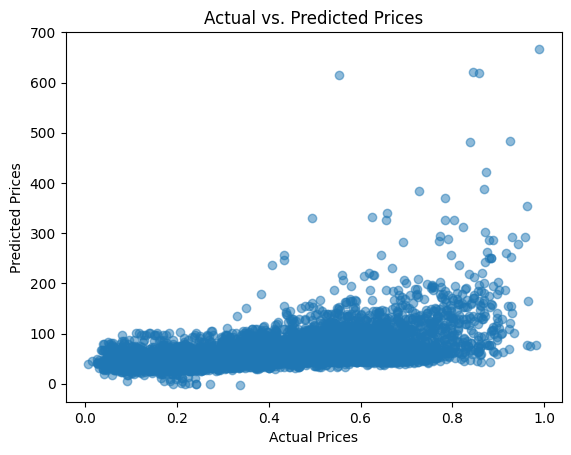

In [201]:
# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

sample features